In [ ]:
#Viene de BD_GBIF_completo 
#Prueba para 1 ciudad

In [ ]:
#DataFrame de las ocurrencias

occ_niebla = pd.read_csv(r'C:\Users\Mariana\Desktop/GBIF_BDdata/GBIF_Niebla_2021/occurrence.txt',sep='\t')
#occ_niebla = pd.read_csv('gdrive/MyDrive/Doctorado_UACH/BD_resili/GBIF_BDdata/occurrence.txt',sep='\t')

#Tomar solo las columnas útiles
occ_niebla.copy()
occ_niebla = occ_niebla.take(col_used,axis=1)
occ_niebla.rename(columns={'class': 'clase'}, inplace=True)
#occ_niebla = occ_niebla.rename(columns={'class':'class_tax'}, inplace=True) #no entiendo por qué no funciona igual que con .take ... pero bueno

#Para buscar columnas
#[col for col in occ_niebla.columns if 'clas' in col]

In [20]:
#Ocurrencias totales
occu_niebla = len(occ_niebla)


In [21]:
#Riqueza de especies (número de especies)
esp_niebla = len(occ_niebla['verbatimScientificName'].value_counts())

 #Especies (verbatimScientificName) y cuántas ocurrencias hay por especie
esp_niebla_series = occ_niebla['verbatimScientificName'].value_counts()

#Dataframe con cálculos. 1 Dataframe por ciudad (?)
esp_niebla_frame = pd.DataFrame(esp_niebla_series)

#Columnas del dataframe
esp_niebla_frame['pi'] = esp_niebla_frame['verbatimScientificName']/occu_niebla
esp_niebla_frame['lnpi'] = np.log(esp_niebla_frame['pi'])
esp_niebla_frame['pixlnpi'] = esp_niebla_frame['pi']*esp_niebla_frame['lnpi']
esp_niebla_frame['pi2'] = esp_niebla_frame['pi']*esp_niebla_frame['pi']

#Shannon-Weiner
esp_sw_niebla = round(-1*esp_niebla_frame['pixlnpi'].sum(),3)
#Gini-Simpson
esp_gs_niebla = round(1-(esp_niebla_frame['pi2'].sum()),3)
#Hmax
esp_hmax_niebla = round(np.log(esp_niebla),3)
#Pielou
esp_p_niebla = round((esp_sw_niebla/esp_hmax_niebla),3)

niebla = {('Occurrences',occu_niebla),('Sp_richness',esp_niebla),('Sp_Shannon-weiner',esp_sw_niebla),('Sp_Gini-Simpson',esp_gs_niebla),('Sp_Pielou',esp_p_niebla)}


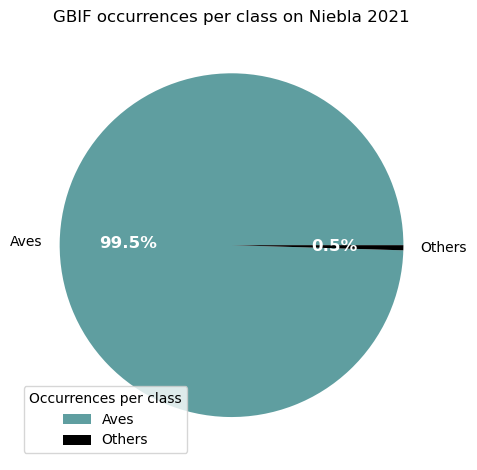

In [25]:
#Gráfico de Clases. Aún no me resulta bien :(

colors = ['cadetblue', 'black']

#Total Class
class_niebla = occ_niebla['clase'].value_counts()
class_niebla_frame = pd.DataFrame(class_niebla)
class_niebla_frame['percent'] = round(((class_niebla_frame['clase']/class_niebla_frame['clase'].sum())*100),2)
class_niebla_aves_ = occ_niebla.query("clase == 'Aves'")
class_niebla_aves = class_niebla_aves_['clase'].value_counts()

#Class excluding Aves
class_niebla_notaves_ = occ_niebla.query("clase!='Aves'")
class_niebla_notaves = class_niebla_notaves_['clase'].value_counts()
class_niebla_notaves_f = pd.DataFrame(class_niebla_notaves)
class_niebla_notaves_f['percent'] = round(((class_niebla_notaves_f['clase']/class_niebla_notaves_f['clase'].sum())*100),1)
class_niebla_notaves_f['percent'] = class_niebla_notaves_f['percent'].astype(str) + '%'

fig1, ax1 = plt.subplots()
labels = ['Aves','Others']
sizes = [int(class_niebla.loc['Aves']),class_niebla_notaves_.shape[0]]
sizes_p = [round(100*sizes[0]/(sizes[0]+sizes[1]),1),round(100*sizes[1]/(sizes[0]+sizes[1]),1)]
wedges, texts, pcts =ax1.pie(sizes,labels=labels,autopct='%1.1f%%',colors = colors) #https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
plt.setp(pcts, color='white', fontweight='bold',size=12)
ax1.set_title("GBIF occurrences per class on Niebla 2021")
ax1.legend(labels, title="Occurrences per class",loc='lower left')
plt.tight_layout()
plt.show()

# ploteo sin legend
#ax1.pie(sizes, labels=labels,autopct='%1.1f%%',pctdistance=1.2,labeldistance=1.5)
#plot_class_niebla = class_niebla.plot.pie(figsize=(6,6))
#plot_class_niebla.legend(title='Classes',loc="best")
           


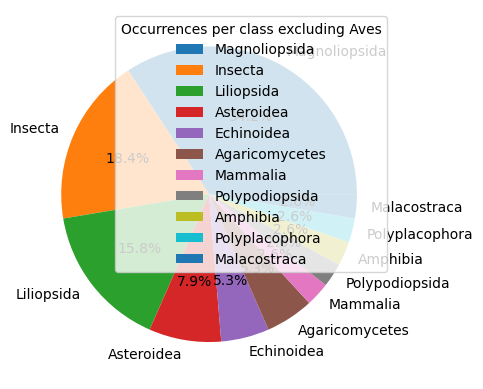

In [26]:
#Plot no aves

#plot_class_niebla_notaves = class_niebla_notaves.plot.pie(figsize=(6,6))
#plot_class_niebla_notaves.legend(title='Classes not including Aves',loc="best")

fig2, ax2 = plt.subplots()
labels2 = class_niebla_notaves_f.index.tolist()
sizes2 = class_niebla_notaves_f.clase.tolist()
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%')
ax2.legend(title="Occurrences per class excluding Aves", loc='best')
           
           
plt.show()

In [27]:
#Clase Aves
clase_niebla = occ_niebla.copy()
clase_niebla = occ_niebla.query("clase == 'Aves'")

#Frame Order class Aves
clas_order_niebla_frame = clase_niebla.groupby('order')['family'].nunique().to_frame().sort_values(by='family',ascending=False)

In [28]:
clas_order_niebla_frame

,family
order,
Passeriformes,13
Charadriiformes,6
Accipitriformes,3
Pelecaniformes,3
Procellariiformes,3
Suliformes,2
Anseriformes,1
Apodiformes,1
Columbiformes,1


In [29]:
#Los que no funcionaron
#clase_niebla.groupby('order')['family'].value_counts()
#clase_niebla['order'].unique()
#clas_order_fam_niebla = clase_niebla['order'].value_counts(['family'])
#clas_order_fam_niebla

In [30]:
#Riqueza específica order per class
cla_or_niebla =len(clas_order_niebla_frame)

#Riqueza específica family per class
cla_fam_niebla = clas_order_niebla_frame['family'].sum()

#Columnas del dataframe
clas_order_niebla_frame['pi'] = clas_order_niebla_frame['family']/cla_fam_niebla
clas_order_niebla_frame['lnpi'] = np.log(clas_order_niebla_frame['pi'])
clas_order_niebla_frame['pixlnpi'] = clas_order_niebla_frame['pi']*clas_order_niebla_frame['lnpi']
clas_order_niebla_frame['pi2'] = clas_order_niebla_frame['pi']*clas_order_niebla_frame['pi']

#Shannon-Weiner
clas_order_sw_niebla = round(-1*clas_order_niebla_frame['pixlnpi'].sum(),3)
#Gini-Simpson
clas_order_gs_niebla = round(1-(clas_order_niebla_frame['pi2'].sum()),3)
#Hmax
clas_order_hmax_or_niebla = round(np.log(cla_or_niebla),3)
clas_order_hmax_fam_niebla = round(np.log(cla_fam_niebla),3)
#Pielou
clas_order_p_or_niebla = round((clas_order_sw_niebla/clas_order_hmax_or_niebla),3)
clas_order_p_fam_niebla = round((clas_order_sw_niebla/clas_order_hmax_fam_niebla),3)


niebla_aves = {('Aves_Richness_order',cla_or_niebla),('Aves_Richness_family',cla_fam_niebla),
               ('Aves_Shannon-Weiner',clas_order_sw_niebla),('Aves_Gini-Simpson',clas_order_gs_niebla),
               ('Aves_Pielou_order',clas_order_p_or_niebla),('Aves_Pielou_family',clas_order_p_fam_niebla)}

#niebla_aves = {('Aves_Occurrences',xxxx),('Aves_Richness_order',cla_or_niebla),('Aves_Richness_family',cla_fam_niebla),
#               ('Aves_Shannon-Weiner',clas_order_sw_niebla),('Aves_Gini-Simpson',clas_order_gs_niebla),
#               ('Aves_Pielou_order',clas_order_p_or_niebla),('Aves_Pielou_family',clas_order_p_fam_niebla)}